# Laboratorium 8 - MOwNiT2

<br> https://github.com/kzajac/Mownit2018/blob/master/Mownit_lab8.ipynb
<br> (seria 8: https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/)

In [1]:
import Pkg

Pkg.add("Plots")
Pkg.add("QuadGK")
Pkg.add("DataFrames")
Pkg.add("Polynomials")

using Plots
using QuadGK
using DataFrames
using Polynomials

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


## Całkowanie



### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź (np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia

In [2]:
function legendre_poly(k)
    if k == 0
        return Poly([1])
    elseif k == 1
        return Poly([0,1])
    else
        return (2*k-1) / k * Poly([0,1]) * legendre_poly(k-1) - (k-1) / k * legendre_poly(k-2)
    end
end

legendre_poly (generic function with 1 method)

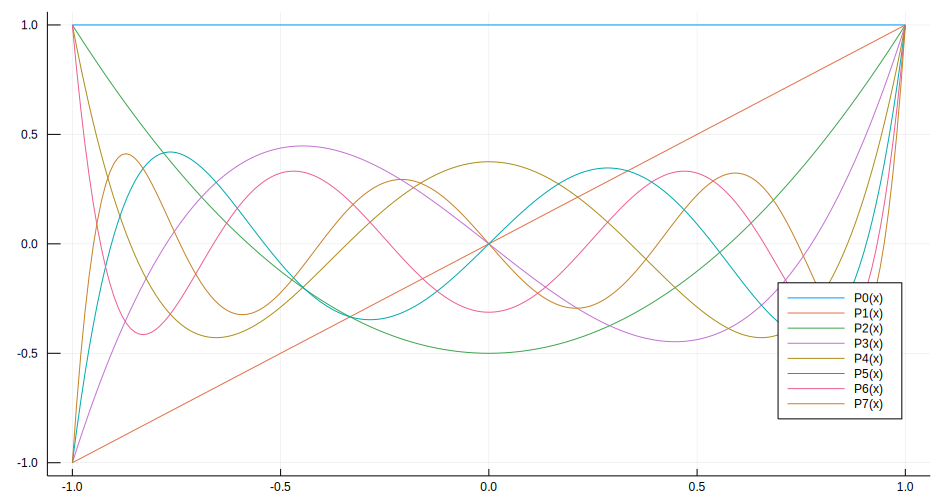

In [3]:
x = -1:0.01:1

for k = 0:7
    y = legendre_poly(k)(x)
    p = plot!(x, y, label = "P$k(x)")
end

plot!(size = (950, 500), legend = :bottomright)

In [4]:
for k = 2:4
    print("Legendre_Poly P$k(x): ", legendre_poly(k),
        "\n\tLegendre roots: ", roots(legendre_poly(k)), 
          "\n\tGauss roots: ", gauss(k)[1], "\n\n")
end

Legendre_Poly P2(x): Poly(-0.5 + 1.5*x^2)
	Legendre roots: [-0.57735, 0.57735]
	Gauss roots: [-0.57735, 0.57735]

Legendre_Poly P3(x): Poly(-1.5*x + 2.5*x^3)
	Legendre roots: [-0.774597, 0.774597, 0.0]
	Gauss roots: [-0.774597, 0.0, 0.774597]

Legendre_Poly P4(x): Poly(0.375 - 3.75*x^2 + 4.375*x^4)
	Legendre roots: [-0.861136, 0.861136, -0.339981, 0.339981]
	Gauss roots: [-0.861136, -0.339981, 0.339981, 0.861136]



### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna

In [5]:
function integral_with_gauss_method_one_to_one(f, k)
    (xp,a) = gauss(Float64,k)
    sum(a .* f.(xp))
end

integral_with_gauss_method_one_to_one (generic function with 1 method)

In [6]:
epsilon = 1.0e-8

results_one_to_one = DataFrame(gauss_points=Int[], polyint_result=Float64[],
    integral_with_gauss_result=Float64[], absolute_error=Float64[], relative_error=Float64[])

for gauss_points in range(1,9)
    exact = true
    poly_degree = 0
    poly = Poly([rand()])
    
    while exact   
        poly *= Poly([rand(), rand()])
        poly_degree += 1
        
        polyint_result = polyint(poly, -1, 1)
        integral_with_gauss_result = integral_with_gauss_method_one_to_one(poly, gauss_points)
        diff = abs(integral_with_gauss_result - polyint_result)
        
        push!(results_one_to_one, 
            [gauss_points, polyint_result, integral_with_gauss_result, diff, diff/polyint_result])
            
        if diff > epsilon
            exact = false
        end
    end
    println("gauss_points = ", gauss_points, " ==> exact up to ", poly_degree - 1, "-degree poly\n")
end

results_one_to_one

gauss_points = 1 ==> exact up to 1-degree poly

gauss_points = 2 ==> exact up to 3-degree poly

gauss_points = 3 ==> exact up to 6-degree poly

gauss_points = 4 ==> exact up to 7-degree poly

gauss_points = 5 ==> exact up to 10-degree poly

gauss_points = 6 ==> exact up to 12-degree poly

gauss_points = 7 ==> exact up to 20-degree poly

gauss_points = 8 ==> exact up to 26-degree poly

gauss_points = 9 ==> exact up to 24-degree poly



,gauss_points,polyint_result,integral_with_gauss_result,absolute_error,relative_error
,Int64,Float64,Float64,Float64,Float64
1,1,0.108216,0.108216,4.16334e-17,3.84725e-16
2,1,0.217107,0.0560903,0.161017,0.741647
3,2,0.58604,0.58604,1.11022e-16,1.89445e-16
4,2,0.0289284,0.0289284,0.0,0.0
5,2,0.0494252,0.0494252,6.93889e-18,1.40392e-16
6,2,0.0235774,0.0209292,0.00264816,0.112318
7,3,0.0345539,0.0345539,6.93889e-18,2.00813e-16
8,3,0.0168478,0.0168478,0.0,0.0
9,3,0.0126798,0.0126798,1.73472e-18,1.36811e-16


### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.



In [7]:
function integral_with_gauss_method(f, a, b, k)
    fn = x -> f((b+a)/2 + (b-a)/2 * x)
    return (b-a)/2 * integral_with_gauss_method_one_to_one(fn, k)
end

integral_with_gauss_method (generic function with 1 method)

In [8]:
epsilon = 1.0e-8

results = DataFrame(gauss_points=Int[], a=Int[], b=Int[], polyint_result=Float64[],
    integral_with_gauss_result=Float64[], absolute_error=Float64[], relative_error=Float64[])

for gauss_points in range(1,9)
    exact = true
    poly_degree = 0
    poly = Poly([rand()])
    a = rand(-10:0)
    b = rand(0:10)
    
    while exact   
        poly *= Poly([rand(), rand()])
        poly_degree += 1
        
        polyint_result = polyint(poly, a, b)
        integral_with_gauss_result = integral_with_gauss_method(poly, a, b, gauss_points)
        diff = abs(integral_with_gauss_result - polyint_result)
        
        push!(results, 
            [gauss_points, a, b, polyint_result, integral_with_gauss_result, diff, diff/polyint_result])
            
        if diff > epsilon
            exact = false
        end
    end
    println("gauss_points = ", gauss_points, " ==> exact up to ", poly_degree - 1, "-degree poly\n")
end

results

gauss_points = 1 ==> exact up to 1-degree poly

gauss_points = 2 ==> exact up to 3-degree poly

gauss_points = 3 ==> exact up to 5-degree poly

gauss_points = 4 ==> exact up to 7-degree poly

gauss_points = 5 ==> exact up to 9-degree poly

gauss_points = 6 ==> exact up to 12-degree poly

gauss_points = 7 ==> exact up to 13-degree poly

gauss_points = 8 ==> exact up to 10-degree poly

gauss_points = 9 ==> exact up to 17-degree poly



,gauss_points,a,b,polyint_result,integral_with_gauss_result,absolute_error,relative_error
,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,1,-4,1,-3.39152,-3.39152,0.0,-0.0
2,1,-4,1,6.73169,2.02236,4.70933,0.699577
3,2,-5,4,4.39665,4.39665,1.77636e-15,4.04025e-16
4,2,-5,4,4.17997,4.17997,8.88178e-16,2.12484e-16
5,2,-5,4,4.34241,4.34241,0.0,0.0
6,2,-5,4,7.6009,6.51143,1.08948,0.143335
7,3,-4,1,-0.157871,-0.157871,5.55112e-17,-3.51623e-16
8,3,-4,1,0.438985,0.438985,5.55112e-17,1.26453e-16
9,3,-4,1,-0.42391,-0.42391,5.55112e-17,-1.3095e-16


### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [9]:
p1 = Poly([1., 2., 3., 4.]) # 4x^3 + 3x^2 + 2x + 1

polyint_res = polyint(p1, -6, 6)
(quadgk_res, quadgk_err) = quadgk(p1, -6, 6)

println("polyint: ", polyint_res)
println("quadgk: ", quadgk_res, " err: ", quadgk_err)

polyint: 444.0
quadgk: 443.9999999999999 err: 3.979039320256561e-13


In [10]:
gaussian = x -> (1 / (sqrt(2 * pi))) * exp(-(x * x) / 2)
(quadgk_res, quadgk_err) = quadgk(gaussian, -Inf, Inf)
println("quadgk: ", quadgk_res, " err: ", quadgk_err)

quadgk: 1.0000000000032583 err: 1.4395584941504537e-8


### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

In [11]:
function trapezoid(f, a, b, steps)
    sum = 0
    h = (b-a)/steps
    for i in 1:steps
        sum += (f(a+(i-1)*h) + f(a+i*h)) * h /2
    end
    sum
end

trapezoid (generic function with 1 method)

In [12]:
a = -6
b = 6
p1 = Poly([1., 7., -3., 8., 8., -2., 3.])
println(p1)

Poly(1.0 + 7.0*x - 3.0*x^2 + 8.0*x^3 + 8.0*x^4 - 2.0*x^5 + 3.0*x^6)


In [16]:
results_trapezoid = DataFrame(steps = Int64[], trapezoid_result = Float64[], polyint_result = Float64[], error = Float64[])

for i in 10:25:1000
    polyint_result = polyint(p1, a, b)
    trapezoid_result = trapezoid(p1, a, b, i)
    push!(results_trapezoid, [i,trapezoid_result ,polyint_result, abs(polyint_result - trapezoid_result)])
end

results_trapezoid


,steps,trapezoid_result,polyint_result,error
,Int64,Float64,Float64,Float64
1,10,2.99199e5,2.64408e5,34790.6
2,35,2.67282e5,2.64408e5,2873.92
3,60,265387.0,2.64408e5,978.609
4,85,264896.0,2.64408e5,487.699
5,110,2.647e5,2.64408e5,291.23
6,135,2.64602e5,2.64408e5,193.361
7,160,264546.0,2.64408e5,137.659
8,185,2.64511e5,2.64408e5,102.969
9,210,2.64488e5,2.64408e5,79.9128


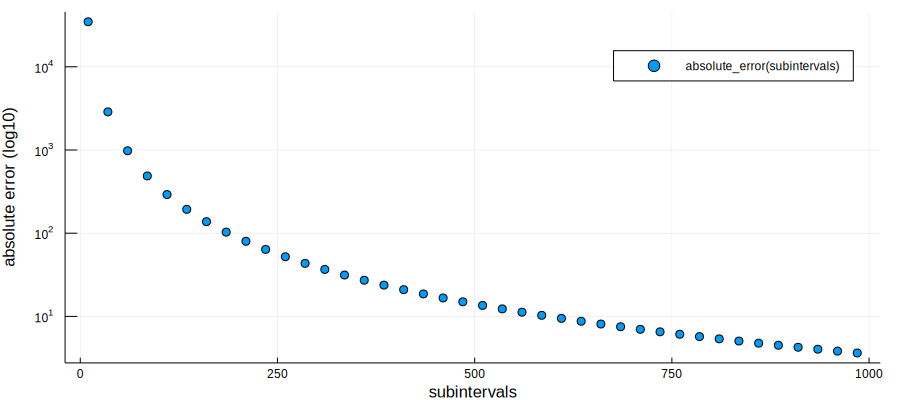

In [17]:
scatter(results_trapezoid[:steps], results_trapezoid[:error],
    xlabel = "subintervals",
    ylabel = "absolute error (log10)",
    label = "absolute_error(subintervals)",
    yscale = :log10,
    size = (900, 400))